In this notebook, I will check the depth and pass filter.
Depth does not seem to be present

In [1]:
%run ../scripts/notebook_settings.py
meta_data_samples = pd.read_excel("../data/New_Papio.xlsx")
vcf_dir = "/faststorage/project/primatediversity/data/PG_baboons_pananu3_23_2_2021/"
vcf_names = "output.filtered.snps.{}.removed.AB.pass.vep.vcf.gz"
vcf_path = vcf_dir+vcf_names
meta_data_samples = meta_data_samples.loc[meta_data_samples.Origin != "captive"] #Removing captive individual
vcf_callset = allel.read_vcf(vcf_path.format("chrX"), samples=meta_data_samples["PGDP_ID"].tolist())

In [2]:
vcf_callset.keys()

dict_keys(['samples', 'calldata/GT', 'variants/ALT', 'variants/CHROM', 'variants/FILTER_PASS', 'variants/ID', 'variants/POS', 'variants/QUAL', 'variants/REF'])

Number of not passing sites

In [3]:
vcf_callset["variants/FILTER_PASS"]
print(sum(vcf_callset["variants/FILTER_PASS"]), len(vcf_callset["variants/FILTER_PASS"]))

2923212 2923212


Pass state has already been filtered

Checking up on qual

In [4]:
d = {"qual": vcf_callset["variants/QUAL"]}
qual_df = pd.DataFrame(data=d)

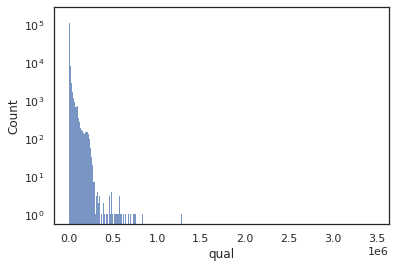

In [5]:
g = sns.histplot(qual_df, x="qual")
g.set_yscale("log")

Looking at the zarr setup

In [12]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_01_03_2021/callset.zarr/chrX"

In [13]:
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode='r')
callset.tree(expand=False)

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, name='calldata', nodes=(Node(disabled=Tru…

DP is present, but where does it come from? Is it not loaded when taking from the vcf?

In [19]:
callset["calldata/DP"]

<zarr.core.Array '/calldata/DP' (2923212, 217) int16 read-only>